In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


In [35]:

df_train = pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\train_data.txt", delimiter=':::')

C:\Users\gaura\AppData\Local\Temp\ipykernel_19280\2781180943.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\train_data.txt", delimiter=':::')


In [36]:
df_test=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data.txt",delimiter=':::')

C:\Users\gaura\AppData\Local\Temp\ipykernel_19280\1560589076.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data.txt",delimiter=':::')


In [37]:
df_test.columns=['S.No','Movie','Description']

In [38]:
df_test.drop(['S.No'],inplace=True,axis=1)
df_test.head()

,Movie,Description
0,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,Er nu zhai (1955),Before he was known internationally as a mart...
4,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [39]:
df_train.columns=['S.No','Movie','Gnere','Description']
df_train.head()

,S.No,Movie,Gnere,Description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [40]:
df_train.shape

(54213, 4)

In [41]:
df_train.drop(['S.No'],inplace=True,axis=1)

In [42]:
df_train.Gnere.value_counts()

Gnere
drama           13612
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [43]:
df_train.isnull().sum()

Movie          0
Gnere          0
Description    0
dtype: int64

In [44]:
gnere=df_train['Gnere'].value_counts()
df_gnere=df_train['Movie']
df_gnere.head()

0                         Cupid (1997) 
1     Young, Wild and Wonderful (1980) 
2                The Secret Sin (1915) 
3               The Unrecovered (2007) 
4               Quality Control (2011) 
Name: Movie, dtype: object

In [45]:
gnere_counts=df_train['Gnere'].value_counts()
gnere_counts_df=gnere_counts.reset_index()
gnere_counts_df.columns=['Gnere','Count']
gnere_counts_df.head()


,Gnere,Count
0,drama,13612
1,documentary,13096
2,comedy,7447
3,short,5073
4,horror,2204


In [46]:
df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')

C:\Users\gaura\AppData\Local\Temp\ipykernel_19280\1208129856.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')


<BarContainer object of 27 artists>

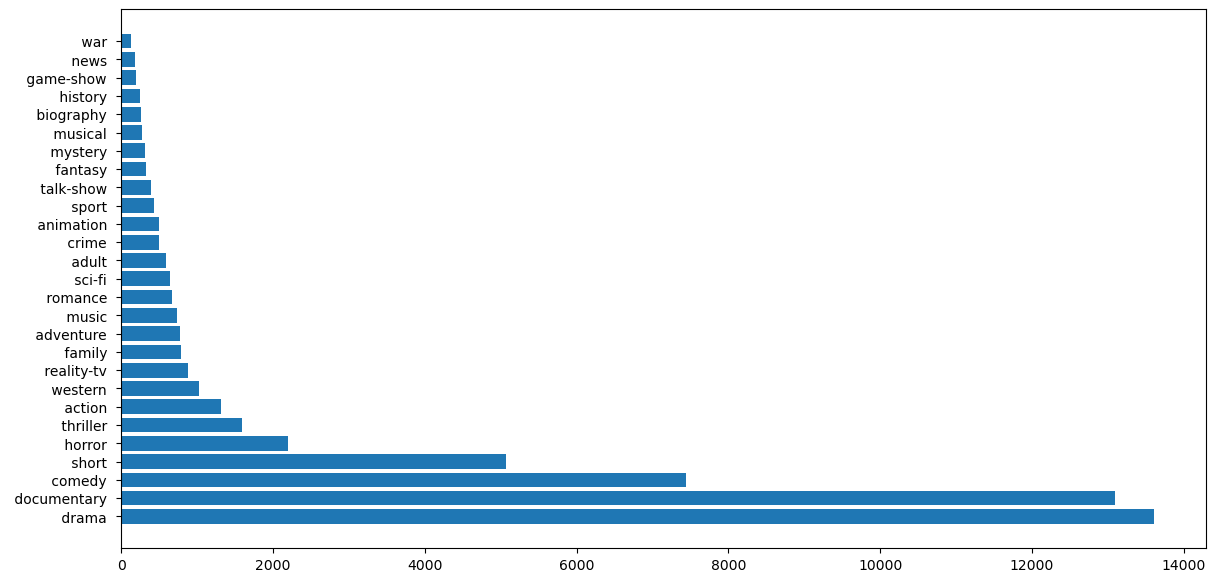

In [47]:
fig,ax=plt.subplots(figsize=(14,7))
plt.barh(gnere_counts_df['Gnere'],gnere_counts_df['Count'])


In [48]:
nlp=spacy.load("en_core_web_sm")
def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)    

In [49]:
df_train['Description_Preprocessed']=df_train['Description'].apply(preprocess)

In [50]:
df_test['Description_Preprocessed']=df_test['Description'].apply(preprocess)

In [51]:
df_train.head(2)

,Movie,Gnere,Description,Description_Preprocessed
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship ...
1,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip Museum Natural ...


In [52]:
df_test.head()

,Movie,Description,Description_Preprocessed
0,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",Spain March 1964 Quico naughty child belong ...
1,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life Albin family shepherd North Transy...
2,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die speak brother 10 year cancer Dieg...
3,Er nu zhai (1955),Before he was known internationally as a mart...,know internationally martial art superstar B...
4,Riddle Room (2016),Emily Burns is being held captive in a room w...,Emily Burns hold captive room idea get deter...


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()

In [54]:
X_train=v.fit_transform(df_train['Description_Preprocessed'])

In [55]:
X_train.shape

(54213, 110378)

In [56]:
X_test=v.transform(df_test['Description_Preprocessed'])

In [57]:
X_test.shape

(54199, 110378)

In [58]:
df_train.head()

,Movie,Gnere,Description,Description_Preprocessed
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship ...
1,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip Museum Natural ...
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father end meet Edith twin s...
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refer un recover body ground zero...
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,Quality Control consist series 16 mm single ...


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
print(len(df_train['Gnere']))
print(len(df))


54213
54199


In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
df_train['Gnere_num'] = le.fit_transform(df_train['Gnere'])


In [62]:
df_train.head()

,Movie,Gnere,Description,Description_Preprocessed,Gnere_num
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship ...,24
1,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip Museum Natural ...,1
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father end meet Edith twin s...,8
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refer un recover body ground zero...,8
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,Quality Control consist series 16 mm single ...,7


In [63]:
df_test_sol=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')
df_test_sol.columns=['S.No','Movie','Gnere','Description']
df_test_sol.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_19280\3301074659.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test_sol=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')


,S.No,Movie,Gnere,Description
0,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...


In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test_sol['Gnere_num']=le.fit_transform(df_test_sol['Gnere'])
df_test_sol.head()

,S.No,Movie,Gnere,Description,Gnere_num
0,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...,13


In [65]:
df_train['Gnere'].value_counts()

Gnere
drama           13612
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [66]:
df_test_sol['Gnere'].value_counts()

Gnere
drama           13612
documentary     13096
comedy           7446
short            5072
horror           2204
thriller         1589
action           1314
western          1032
reality-tv        883
family            783
adventure         775
music             731
romance           672
sci-fi            646
adult             590
crime             505
animation         498
sport             431
talk-show         391
fantasy           322
mystery           318
musical           276
biography         264
history           243
game-show         193
news              181
war               132
Name: count, dtype: int64

In [67]:
df_train.nunique()

Movie                       54213
Gnere                          27
Description                 54085
Description_Preprocessed    54081
Gnere_num                      27
dtype: int64

In [68]:
df_train.isnull().sum()

Movie                       0
Gnere                       0
Description                 0
Description_Preprocessed    0
Gnere_num                   0
dtype: int64

In [69]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [70]:
y_train=df_train['Gnere_num']

In [71]:
clf.fit(X_train,df_train['Gnere_num'])

MultinomialNB()

In [72]:
y_pred=clf.predict(X_test)

In [73]:
clf.predict(X_test[:10])

array([8, 7, 8, 8, 8, 8, 8, 7, 7, 8])

In [74]:
print(classification_report(df_test_sol['Gnere_num'],y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.72      0.05      0.09      7446
           6       0.00      0.00      0.00       505
           7       0.51      0.89      0.65     13096
           8       0.38      0.87      0.53     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       1.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       318
          17       0.00    

c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

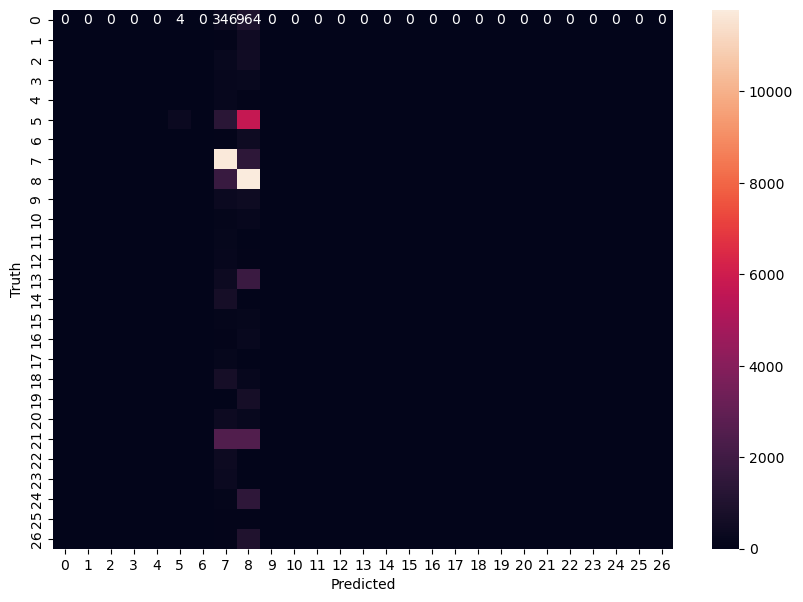

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df_test_sol['Gnere_num'],y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
X_train

<54213x110378 sparse matrix of type '<class 'numpy.float64'>'
	with 2402654 stored elements in Compressed Sparse Row format>

In [78]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_train,y_train)

In [79]:
clf.fit(X_resampled,y_resampled)

MultinomialNB()

In [80]:
y_pred=clf.predict(X_test)

In [81]:
print(classification_report(df_test_sol['Gnere_num'],y_pred))

              precision    recall  f1-score   support

           0       0.34      0.47      0.40      1314
           1       0.43      0.63      0.51       590
           2       0.29      0.27      0.28       775
           3       0.27      0.26      0.26       498
           4       0.03      0.06      0.04       264
           5       0.61      0.46      0.52      7446
           6       0.14      0.26      0.18       505
           7       0.73      0.64      0.68     13096
           8       0.67      0.46      0.55     13612
           9       0.22      0.27      0.24       783
          10       0.16      0.24      0.19       322
          11       0.71      0.71      0.71       193
          12       0.09      0.17      0.12       243
          13       0.50      0.71      0.58      2204
          14       0.35      0.74      0.47       731
          15       0.16      0.19      0.18       276
          16       0.11      0.13      0.12       318
          17       0.21    

In [82]:
from sklearn.svm import SVC
clf=SVC()

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial')
lr.fit(X_resampled,y_resampled)

c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [85]:
y_pred1=lr.predict(X_test)

In [86]:
print(classification_report(df_test_sol['Gnere_num'],y_pred1))

              precision    recall  f1-score   support

           0       0.35      0.48      0.40      1314
           1       0.47      0.59      0.52       590
           2       0.30      0.34      0.32       775
           3       0.26      0.23      0.24       498
           4       0.07      0.04      0.05       264
           5       0.58      0.57      0.57      7446
           6       0.19      0.25      0.21       505
           7       0.76      0.70      0.73     13096
           8       0.67      0.53      0.59     13612
           9       0.22      0.30      0.25       783
          10       0.20      0.26      0.23       322
          11       0.67      0.69      0.68       193
          12       0.13      0.14      0.13       243
          13       0.60      0.65      0.62      2204
          14       0.44      0.68      0.54       731
          15       0.21      0.26      0.23       276
          16       0.13      0.10      0.12       318
          17       0.30    